# Q&A HiDoc Topic Modeling

In [1]:
import pandas as pd
import xlrd
#!pip3 install gensim
import gensim

In [103]:
df1 = pd.read_csv("코로나+되나요.csv", names = ["date", "q_title", "q_content"])
df1 = df1.fillna(" ")

df2 = pd.read_csv("코로나+사실인가요.csv", names = ["date", "q_title", "q_content"])
df2 = df2.fillna(" ")

df3 = pd.read_csv("코로나+있나요.csv", names = ["date", "q_title", "q_content"])
df3 = df3.fillna(" ")

df4 = pd.read_csv("코로나+있나요+2.csv", names = ["date", "q_title", "q_content"])
df4 = df4.fillna(" ")

df5 = pd.read_csv("covid_kin_가능한가요.csv")
df5 = df5.fillna(" ")
df5 = df5.drop(["Unnamed: 0"], axis = 1)

df6 = pd.read_csv("covid_kin_거짓인가요.csv")
df6 = df6.fillna(" ")
df6 = df6.drop(["Unnamed: 0"], axis = 1)
df6 = df6.drop(["url"], axis = 1)

df7 = pd.read_csv("covid_kin_맞나요.csv")
df7 = df7.fillna(" ")
df7 = df7.drop(["Unnamed: 0"], axis = 1)
df7 = df7.drop(["url"], axis = 1)

df8 = pd.read_csv("covid_kin_거짓인가요.csv")
df8 = df8.fillna(" ")
df8 = df8.drop(["Unnamed: 0"], axis = 1)
df8 = df8.drop(["url"], axis = 1)

df9 = pd.read_csv("covid_kin_아닌가요.csv")
df9 = df9.fillna(" ")
df9 = df9.drop(["Unnamed: 0"], axis = 1)
df9 = df9.drop(["url"], axis = 1)

df10 = pd.read_csv("covid_kin_팩트인가요.csv")
df10 = df10.fillna(" ")
df10 = df10.drop(["Unnamed: 0"], axis = 1)
df10 = df10.drop(["url"], axis = 1)

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
naver_df = pd.concat(frames)
naver_df["questions"] = naver_df["q_title"].str.cat(naver_df["q_content"], sep = " ")

In [104]:
naver_df.to_csv("naver_df.csv")

In [105]:
naver_df.head()

,date,q_title,q_content,questions
0,2019.12.07,강아지 훈련,9월4일생 코카스파니엘을 분양 받았어요 전 주인분이 아무 훈련도 해두지 않아서 오늘...,강아지 훈련 9월4일생 코카스파니엘을 분양 받았어요 전 주인분이 아무 훈련도 해두지...
1,2019.12.06,어제 시바견 분양을 받았는데 혈변과 점액변을 쌌어요,어제 시바견 분양을 받았는데 혈변과 점액변을 봤어요애견샵 통화 해보니까 추워서 변이...,어제 시바견 분양을 받았는데 혈변과 점액변을 쌌어요 어제 시바견 분양을 받았는데 혈...
2,2019.12.07,내공10 강아지 예방접종 (항체 추가접종) 심장사상충(구충),내공10 데려오려고하는데 그전 궁금한거요~현재 항체가 없을경우1년뒤 추가예방접종을 ...,내공10 강아지 예방접종 (항체 추가접종) 심장사상충(구충) 내공10 데려오려고하는...
3,2019.12.08,강아지 독감? 예방주사 언제 놓을 수 있나요,4개월 안 된 강아지고 얼마전에 5차접종 끝냈구요 하트가드랑 프론트라인 먹이고 발라...,강아지 독감? 예방주사 언제 놓을 수 있나요 4개월 안 된 강아지고 얼마전에 5차접...
4,2019.12.09,강아지 예방접종 문의 (아시는분만),내공10 데려오려고하는데 그전 궁금한거요~1.현재 항체가 없을경우1년뒤 추가예방접종...,강아지 예방접종 문의 (아시는분만) 내공10 데려오려고하는데 그전 궁금한거요~1.현...


In [106]:
from konlpy.tag import Mecab
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma

kkma = Kkma()
komoran = Komoran()
mecab = Mecab()
twitter = Twitter()

/usr/local/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [107]:
for sentence in naver_df['questions'][:5]:
    print("Sentence: "+str(sentence))
    kkma_nouns = kkma.nouns(sentence)
    print("Kkma Nouns: " + str(kkma_nouns))
    komoran_nouns = komoran.nouns(sentence)
    print("Komoran Nouns: " + str(komoran_nouns))
    mecab_nouns = mecab.nouns(sentence)
    print("Mecab Nouns: " + str(mecab_nouns))
    twitter_nouns = twitter.nouns(sentence)
    print("Twitter Nouns: " + str(twitter_nouns))
    print("-------------------------------------------------------------------")

Sentence: 강아지 훈련 9월4일생 코카스파니엘을 분양 받았어요 전 주인분이 아무 훈련도 해두지 않아서 오늘부터 시작해보려 하는데 애기가 식탐이 많아서 훈련용으로 사료를 주려고 하면 흥분을 해서 진정이 안되네요..제가 10분을 기다려도 어디선가 사료 냄새가 나니깐 바닥 냄새만 이리저리 맡으러 돌아다녀요! 어떻게 진정시켜야 할까요 ?3차 접종 마치고 이제 4차 접종 기다리는 중인데 산책 나도되나요 ?
Kkma Nouns: ['강아지', '훈련', '9', '9월4일생', '월', '4', '일생', '코', '코카스', '카스', '엘', '분양', '전', '주인', '주인분', '분', '오늘', '애기', '식탐', '사료', '흥분', '진정', '제가', '10', '10분', '분', '어디', '냄새', '바닥', '3', '3차', '차', '접종', '마', '4차', '차', '중', '산책']
Komoran Nouns: ['강아지', '훈련', '월', '일생', '코카', '스파', '니엘', '분양', '주인', '분이', '훈련', '오늘', '시작', '애기', '식', '탐', '훈련', '사료', '흥분', '진정', '안', '제가', '10분', '사료', '냄새', '바닥', '냄새', '차', '접종', '차', '접종', '중', '산책']
Mecab Nouns: ['강아지', '훈련', '월', '일', '코', '카스파', '니엘', '분양', '주인', '훈련', '오늘', '시작', '애기', '식탐', '훈련', '사료', '흥분', '진정', '제', '분', '어디', '사료', '냄새', '바닥', '냄새', '진정', '차', '접종', '차', '접종', '중', '산책', '나']
Twitter Nouns: ['강아지', '훈련', '코카', '스파니엘', '분양', '전', '주인', '아무', '훈련', '해', '오늘', '시작', '애기', '식탐', '훈련', '용', '사료', '려고',

In [18]:
mecab_nouns = []
for sent in hidoc_qna_df['n_questions']:
    result = mecab.nouns(sent)
    print(result)
    mecab_nouns.append(result)

['코로나', '제', '확진', '자랑', '동선', '하나', '아침', '콧물', '기침', '목', '때', '일어', '콧물', '기침', '몸', '얼굴', '코로나']
['코로나', '제', '전', '속', '기침', '번', '코', '때', '목', '콧물', '몸', '코로나', '감기', '코로나', '차이']
['코로나', '제', '전', '코', '땐', '저녁', '가래', '때문', '속', '기침', '목', '아픔', '열', '코로나', '답변']
['코로나', '제', '전', '코', '땐', '저녁', '가래', '때문', '속', '기침', '목', '아픔', '열', '코로나', '답변']
['코로나', '목', '열', '몸', '느낌', '콧물', '번', '재채기', '코로나', '검사']
['코로나', '지인', '터', '쌀', '백미', '밥', '포장', '쌀', '지인', '자택', '쌀', '일정량', '봉지', '지인', '직업', '교직원', '대학교', '근무', '저', '교통', '공학', '전공', '전문', '기술직', '종사', '쌀', '코로나', '전염', '걱정', '데', '걱정', '질문']
['코로나', '일', '전', '코로나', '확진', '카페', '오후', '시', '저', '시간', '후', '시', '분', '카페', '동선', '불안', '마음', '집', '목', '건조', '것', '열', '코', '확률', '동선', '시간', '시간', '차이', '코', '수']
['코로나', '증상', '곳', '대구', '제', '동네', '확진', '후', '마스크', '착용', '첨', '걱정', '증상', '질문', '기침', '가래', '가슴', '명치', '숨', '때', '느낌', '숨', '느낌', '게', '불편', '못', '느낌', '이물감', '개월', '전', '잠', '스트레스', '닦', '때', '혓바닥', '때', '신물', '토', '

['편도염', '거', '저', '원래', '편도염', '비염', '일', '저', '자취방', '전', '본가', '이비인후과', '방문', '목', '소리', '일', '약', '처방', '약', '사이', '상태', '약', '일', '목', '시작', '가래', '기침', '시작', '코', '콧물', '증상', '일', '자취방', '근처', '이비인후과', '증상', '설명', '의사', '선생', '목과', '코', '상태', '확인', '목', '목', '일', '코', '코', '일', '코', '거', '코', '한쪽', '숨', '코', '증상', '부정', '이유', '설명', '약간', '의문', '채', '저', '처방', '약', '중', '코', '목', '인후통', '외', '증상', '코로나', '확진', '지역', '집', '밖', '적', '코', '걱정', '코로나', '편도염', '걸까요', '목감기']
['목', '월', '말', '목', '병원', '방문', '감기', '초반', '증상', '이번', '주', '월요일', '열', '기침', '콧물', '목', '오른쪽', '부의', '통증', '것', '침', '뭔가', '것', '느낌', '평상시', '목', '기분', '기침', '것', '기분', '코로나', '때문', '인후통', '증상', '불안', '기관지', '편', '걱정', '확진', '접촉', '적']
['어디', '검사', '지', '평소', '체온', '느낌', '평소', '체온', '느낌', '도', '평소', '돕니다', '월', '달', '간', '증상', '목', '쪽', '통수', '통증', '통', '피로감', '목', '아픔', '팔다리', '소화', '불량', '목', '건', '처음', '느낌', '나중', '물', '잔', '느낌', '쇄골', '중간', '부분', '불편', '코', '이후', '집', '활동', '양', '때', '증상', '스트레스', '고열', '적', '

['감기', '잔기침', '아침', '때', '코막', '힘', '등', '증상', '가래', '양', '끈', '하나', '노란색', '투명', '목', '듯', '증세', '의원', '전', '편도', '듯', '기침', '거', '목', '가래', '가래', '때', '특이', '사항', '목뒤', '임파선', '후술', '항생제', '복용', '후', '임파선', '붓기', '증상', '달째', '지속', '병원', '항생제', '장기간', '일', '정도', '복용', '약국', '종합', '감기약', '피', '검사', '달', '간', '번', '정도', '염증', '수치', '정상치', '미량', '것', '이외', '건강', '트러블', '만', '문제', '소견', '말', '월', '중', '흉부', '검사', '이상', '코로나', '전', '지속', '것', '강', '중국', '적', '거', '병원', '거', '말', '감기', '증상', '일', '걱정', '최근', '면역력', '만큼', '생활', '태도', '엉망', '그것', '때문', '감기', '단순', '경우', '검사', '과', '검사']
['가슴', '불안', '우울', '불안', '우울', '호흡기', '내과', '쪽', '레이', '검사', '특이', '사항', '기능', '검사', '마직', '막', '년', '전', '건강', '검진', '땐', '특이', '사항', '폐', '우측', '상단', '결핵', '흔적', '게', '이걸로', '가슴', '통증', '발생', '거', '결론', '기관지', '거', '약', '손님', '상대', '자영업', '자신', '와이프', '고령', '임신', '중', '상황', '와이프', '몸', '걱정', '주변', '사람', '자문', '건강', '염려증', '게', '증세', '신경', '건', '것', '증세', '게', '몸', '위치', '육체', '일', '집중', '정도', '정도', '방치', '병'

['브레인', '포그', '브레인', '포그', '완화', '약', '건강', '기능', '식품', '탈모', '약', '프로', '페시아', '년', '순간', '머리', '안', '구름', '안개', '듯이', '기억력', '저하', '독해력', '저하', '눈', '글', '글', '이해', '사고력', '저하', '증상', '나이', '뇌', '기능', '저하', '생각', '제', '스스로', '정도', '머리', '인식', '이후', '브레인', '포그', '증상', '저', '증상', '탈모', '약', '복용', '사람', '증상', '복용', '중단', '브레인', '포그', '완화', '약', '건강', '기능', '식품', '추천', '건', '검색', '글', '루타', '시티', '콜린', '등등', '무엇']
['성기', '표피', '좁쌀', '성기', '표피', '좁쌀', '게', '지름', '초기', '단순', '표피', '염', '코로나', '때문', '병원', '것', '수']
['비염', '스프레이', '때', '콧속', '이거', '전', '휴지', '알콜', '솜', '번', '게', '코로나', '때문', '위생']
['체온', '정상', '질문', '중학생', '코로나', '바이러스', '유행', '병원', '질문', '저', '체온', '정상', '질문']
['체온', '정상', '저', '중학생', '코로나', '바이러스', '유행', '겁', '제', '체온', '이게', '정상', '질문']
['우한', '폐렴', '문의', '그때', '질문', '학생', '증상', '코로나', '바이러스', '걸', '일반', '내과', '진단', '수', '일반', '내', '진단', '수']
['목감기', '아이스크림', '목', '증상', '며칠', '동안', '코로나', '목감기', '아이스크림', '사실', '걸', '거', '누군', '걸', '아이스크림']
['신경증', '개월', '월', '초', '주말', '주

In [19]:
len(mecab_nouns)

315

In [20]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

# Create Dictionary
id2word = corpora.Dictionary(mecab_nouns)
 
# Create Corpus
texts = mecab_nouns
 
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
 
# View
print(corpus[0])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1)]


In [43]:
# Building LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
id2word=id2word,
num_topics=20,
minimum_probability = 0.0,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto',
per_word_topics=True)

In [44]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.242*"피" + 0.184*"강아지" + 0.011*"이제" + 0.009*"면" + 0.007*"얼굴" + 0.006*"고양이" '
  '+ 0.006*"런닝" + 0.005*"티" + 0.002*"탠" + 0.002*"겉옷"'),
 (1,
  '0.069*"잇몸" + 0.030*"치과" + 0.009*"전문의" + 0.008*"비상" + 0.001*"여자" + '
  '0.000*"어금니" + 0.000*"혹" + 0.000*"반" + 0.000*"사랑니" + 0.000*"생각"'),
 (2,
  '0.115*"감사" + 0.045*"참고" + 0.044*"주문" + 0.042*"진심" + 0.040*"도착" + 0.018*"제품" '
  '+ 0.017*"때문" + 0.015*"피로" + 0.014*"활동" + 0.013*"남성"'),
 (3,
  '0.061*"말" + 0.048*"진료" + 0.037*"기침" + 0.037*"코로나" + 0.033*"목" + 0.029*"입" + '
  '0.027*"때" + 0.024*"제" + 0.023*"끝" + 0.020*"코"'),
 (4,
  '0.000*"손" + 0.000*"처리" + 0.000*"사용" + 0.000*"주변" + 0.000*"사람" + 0.000*"문제" '
  '+ 0.000*"경우" + 0.000*"밖" + 0.000*"동안" + 0.000*"일"'),
 (5,
  '0.035*"종" + 0.034*"스프레이" + 0.030*"터" + 0.025*"물" + 0.024*"집안" + 0.023*"게" + '
  '0.023*"감염" + 0.023*"바닥" + 0.021*"것" + 0.020*"병"'),
 (6,
  '0.110*"팔" + 0.073*"머리" + 0.065*"심장" + 0.057*"질환" + 0.050*"증상" + 0.046*"맥박" '
  '+ 0.043*"건지" + 0.029*"거" + 0.026*"이틀" + 0.018*"몸살"'),
 (7,
  '

In [36]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) # a measure of how good the model is. lower the better.
 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=mecab_nouns, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.962446519360808

Coherence Score:  0.42615152964778125


In [26]:
# Creating LDA model using Mallet
mallet_path = '/Users/SeoyeonHong/Downloads/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [27]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))
 
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=mecab_nouns, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(19,
  [('기침', 0.19315403422982885),
   ('증상', 0.09535452322738386),
   ('일', 0.08190709046454768),
   ('가래', 0.07823960880195599),
   ('목', 0.07212713936430318),
   ('약', 0.061124694376528114),
   ('처방', 0.044009779951100246),
   ('이비인후과', 0.03667481662591687),
   ('콧물', 0.03667481662591687),
   ('항생제', 0.03178484107579462)]),
 (9,
  [('마스크', 0.1133428981348637),
   ('손', 0.08895265423242468),
   ('데', 0.05595408895265423),
   ('때', 0.03873744619799139),
   ('착용', 0.03730272596843615),
   ('집', 0.03156384505021521),
   ('사용', 0.03156384505021521),
   ('문', 0.03156384505021521),
   ('옷', 0.02582496413199426),
   ('후', 0.02582496413199426)]),
 (15,
  [('코로나', 0.09161490683229814),
   ('감염', 0.07453416149068323),
   ('게', 0.06521739130434782),
   ('것', 0.04503105590062112),
   ('물', 0.043478260869565216),
   ('바이러스', 0.040372670807453416),
   ('가능', 0.037267080745341616),
   ('때문', 0.03571428571428571),
   ('거', 0.034161490683229816),
   ('집', 0.026397515527950312)]),
 (1,
  [('코로나', 0.

Using the elbow method to find the optimal number of topics

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
 
    return model_list, coherence_values

In [29]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=mecab_nouns, start=2, limit=40, step=6)

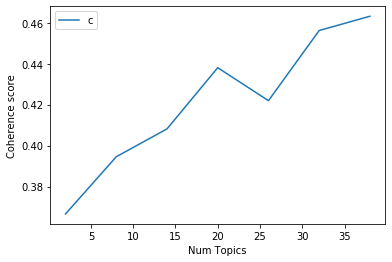

In [30]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [65]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3667
Num Topics = 8  has Coherence Value of 0.3946
Num Topics = 14  has Coherence Value of 0.4082
Num Topics = 20  has Coherence Value of 0.438
Num Topics = 26  has Coherence Value of 0.422
Num Topics = 32  has Coherence Value of 0.4562
Num Topics = 38  has Coherence Value of 0.4631


In [66]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.157*"정도" + 0.135*"거" + 0.072*"머리" + 0.063*"시간" + 0.036*"곳" + 0.033*"코로나" '
  '+ 0.030*"피" + 0.028*"눈" + 0.020*"영향" + 0.019*"오늘"'),
 (1,
  '0.120*"코" + 0.077*"가슴" + 0.068*"숨" + 0.048*"비염" + 0.044*"전" + 0.043*"일" + '
  '0.038*"적" + 0.034*"호흡" + 0.028*"최근" + 0.026*"쪽"'),
 (2,
  '0.094*"중" + 0.079*"때문" + 0.062*"치료" + 0.053*"운동" + 0.039*"신경" + 0.026*"며칠" '
  '+ 0.023*"어깨" + 0.021*"밤" + 0.021*"생활" + 0.019*"진통제"'),
 (3,
  '0.212*"것" + 0.110*"통증" + 0.065*"불안" + 0.059*"전" + 0.050*"집" + 0.047*"오른쪽" + '
  '0.031*"번" + 0.025*"가슴" + 0.023*"듯" + 0.023*"이물감"'),
 (4,
  '0.143*"수" + 0.070*"걱정" + 0.057*"폐렴" + 0.053*"염증" + 0.042*"시작" + 0.025*"갈비뼈" '
  '+ 0.018*"위" + 0.018*"우한" + 0.016*"안쪽" + 0.016*"뼈"'),
 (5,
  '0.099*"때" + 0.066*"병원" + 0.064*"왼쪽" + 0.045*"소리" + 0.044*"아이" + 0.042*"귀" + '
  '0.033*"거" + 0.025*"살" + 0.023*"적" + 0.023*"행동"'),
 (6,
  '0.159*"증상" + 0.155*"일" + 0.067*"감기" + 0.041*"심장" + 0.038*"처방" + 0.038*"열" + '
  '0.034*"몸살" + 0.034*"항생제" + 0.026*"주일" + 0.026*"편도"'),
 (7,
  '0.081

In [68]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=hidoc_qna_df['n_questions']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=hidoc_qna_df['n_questions'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.1086,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",코로나인가요 제가 확진자랑 동선도 하나도안겹쳐요 근데 오늘 아침에 콧물이좀 많이나왔...
1,1,9.0,0.0949,"코로나, 제, 건, 몸, 건가요, 주, 차, 환자, 가족, 안",코로나일까요 제가 전에도 속이 근질거려서 기침을 몇번했고 코는 누워있을때 막혔거든요...
2,2,14.0,0.0761,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",코로나 제가 전부터 누워있으면 코가막혔거든요? 일어서 있을땐 잘안막혔구요 근데 어제...
3,3,14.0,0.0744,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",코로나 제가 전부터 누워있으면 코가막혔거든요? 일어서 있을땐 잘안막혔구요 근데 어제...
4,4,14.0,0.0769,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",코로나19 목이 아프거나 열이 나진 않고몸이 약간 서늘한 느낌이 들어요콧물은 안나고...
...,...,...,...,...,...
310,310,0.0,0.0906,"정도, 거, 머리, 시간, 곳, 코로나, 피, 눈, 영향, 오늘",약을 처방받은 이유는.. 이상한 두통인지 현기증인지가 갑자기 찾아왔어요 4일전부터 ...
311,311,17.0,0.2687,"후, 열, 도, 아침, 체온, 시, 날, 이상, 얼굴, 힘",안녕하세요 자기전 소변후에 생리시작전이나 끝무렵에나오는 갈색 비슷한 냉이묻어나왔고...
312,312,5.0,0.1140,"때, 병원, 왼쪽, 소리, 아이, 귀, 거, 살, 적, 행동","손가락,손,손목 통증과 팔,손에 힘빠짐이 있습니다 최근 다시 운동을 시작했는데 바벨..."
313,313,2.0,0.2167,"중, 때문, 치료, 운동, 신경, 며칠, 어깨, 밤, 생활, 진통제",어깨 통증 (이상건염) 몇 년 전에 수영을 하다가 팔을 뒤에서 앞으로 돌릴 때 한쪽...


In [70]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0])], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2668,"정도, 거, 머리, 시간, 곳, 코로나, 피, 눈, 영향, 오늘",강아지에게 긁힌 상처 4월 11일(3일전) 에 키우고있는 강아지를 안다가 발톱에 등...
1,0.0,0.2472,"정도, 거, 머리, 시간, 곳, 코로나, 피, 눈, 영향, 오늘",뒤로 넘어지면서 돌에 머리를 부딪혔어요 제가 오늘 뒤로넘어지면서 돌에 머리를 부딪혔...
2,0.0,0.2083,"정도, 거, 머리, 시간, 곳, 코로나, 피, 눈, 영향, 오늘",락스관련질문드립니다 안녕하세요 요즘 여기저기 코로나로인해 방역하는곳이많은데 일반가게...
3,0.0,0.1944,"정도, 거, 머리, 시간, 곳, 코로나, 피, 눈, 영향, 오늘",강아지피 코로나19 제가 강아지 하고 고양이가 싸웠는개 제가 놀래서 강아지 를 안았...
4,0.0,0.1899,"정도, 거, 머리, 시간, 곳, 코로나, 피, 눈, 영향, 오늘",눈을 조금 세게 눌렸어요 안녕하세요 오늘 제가 군대 선임이랑 장난을치다가 군대선임이...
...,...,...,...,...
310,19.0,0.0917,"바이러스, 게, 감염, 것, 가능, 코로나, 물, 때문, 제, 스프레이",코로나 언제 잡힐까요 코로나 전파가 나중에는 그냐ㅇ 공기중에서도 감염된다고 하...
311,19.0,0.0905,"바이러스, 게, 감염, 것, 가능, 코로나, 물, 때문, 제, 스프레이",열은 36.2도인데 두통이 계속 지속되요 목이랑 어깨가 안좋아서 평소 두통이 있었는...
312,19.0,0.0882,"바이러스, 게, 감염, 것, 가능, 코로나, 물, 때문, 제, 스프레이",포피소대에 약간 상처가 생겼습니다 어제 밤에 상처가 생겨서(아주 살짝 찢어졌습니다 ...
313,19.0,0.0720,"바이러스, 게, 감염, 것, 가능, 코로나, 물, 때문, 제, 스프레이",비염스프레이 뿌릴때요 콧속으로 넣어야되는데 이거 넣기전에 대충 휴지로 닦고 넣어도 ...


In [101]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
 
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
 
# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
 
# Show
df_dominant_topics[:19]

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,14.0,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",18.0,0.0571
1.0,9.0,"코로나, 제, 건, 몸, 건가요, 주, 차, 환자, 가족, 안",22.0,0.0698
2.0,14.0,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",11.0,0.0349
3.0,14.0,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",18.0,0.0571
4.0,14.0,"기침, 증상, 가래, 콧물, 확진, 등, 인후통, 근육통, 접촉, 열",18.0,0.0571
5.0,4.0,"수, 걱정, 폐렴, 염증, 시작, 갈비뼈, 위, 우한, 안쪽, 뼈",13.0,0.0413
6.0,1.0,"코, 가슴, 숨, 비염, 전, 일, 적, 호흡, 최근, 쪽",13.0,0.0413
7.0,11.0,"목, 때, 느낌, 말, 부분, 쪽, 이비인후과, 불편, 이후, 침",12.0,0.0381
8.0,9.0,"코로나, 제, 건, 몸, 건가요, 주, 차, 환자, 가족, 안",12.0,0.0381
9.0,8.0,"코로나, 저, 걱정, 사람, 생각, 수, 스트레스, 요즘, 중국, 상황",24.0,0.0762


In [72]:
df_dominant_topics.to_csv('hidoc_qna_topic_count_distribution.tsv', sep = '\t')
sent_topics_sorteddf_mallet.to_csv('hidoc_qna_topic_representation.tsv', sep = '\t')

In [36]:
#def mecab_tokenize(sent):
    #words = mecab.pos(sent, join = True)
    #words = [w for w in words if ('/NN' in w)]
    #return words
#!pip3 install git+https://github.com/lovit/textrank.git
#from textrank import KeywordSummarizer
#keyword_extractor = KeywordSummarizer(tokenize = mecab_tokenize, window = -1, verbose = True)